<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="7" color="#f25625">Computación Cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Temas Selectos de Ingeniería en Computación III</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">2026-1</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="6" color="#f25625">Laboratorio 5: Algoritmos Cuánticos III</font></td>
    </tr>
</table>

<p style="text-align:right; font-weight:bold;">Autora: Claudia Zendejas-Morales</p>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

## Contenido

1. [Algoritmo de Bernstein–Vazirani](#1)
   1. [El problema](#1.1)
   2. [Solución clásica](#1.2)
   3. [Solución cuántica](#1.3)
2. [Algoritmo de Grover](#2)
   1. [Inversión sobre la media](#2.1)
   2. [Algoritmo de búsqueda de Grover](#2.2)
   4. [Ejemplos de uso](#2.3)
3. [Grover en las SpinQ](#3)
4. [Práctica 5](#4)

<a id="1"></a>
# 1. Algoritmo de Bernstein–Vazirani

<a id="1.1"></a>
## 1.1. El problema

Dada una función $f:\{0,1\}^n \rightarrow \{0,1\}$, que se define como $ f(\mathbf{x}) = x \cdot s $, se busca determinar la cadena secreta (secuencia de bits) $s$.

Donde $x \cdot s$ el producto punto de las cadenas de bits módulo 2. Por ejemplo, si $x = 1000$ y $s = 1010$, entonces

$$x\cdot s = 1\cdot 1 + 0\cdot 0 + 0\cdot 1 + 0 \cdot0 = 1 \pmod 2 = 1$$

Esto podría parecer un problema creado artificialmente, porque lo es. Fue diseñado específicamente para resolverse utilizando una computadora cuántica con el fin de demostrar que puede haber ventajas en el uso de algoritmos cuánticos sobre los algoritmos clásicos.

Por ejemplo, si la función $f$ está definida como:

\begin{align*}
	f(00)&=0\\
	f(01)&=1\\
	f(10)&=0\\
	f(11)&=1\\
	\end{align*}

En este ejemplo, la cadena secreta está definida como $s=01$, por lo que tenemos: 

\begin{align*}
f(00)=00\cdot 01 = 0\\
f(01)=01\cdot 01 = 1\\
f(10)=10\cdot 01 = 0\\
f(11)=11\cdot 01 = 1
\end{align*}

Así, el operador unitario $U_f$ toma la forma:

$$ U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus ( x \cdot s)} $$

<a id="1.2"></a>
## 1.2. Solución clásica

Se necesitan $n$ consultas para determinar la cadena secreta $s$.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: 

Consideremos $n=4$ y las siguientes consultas a $f$:

\begin{align*}
f(1000) &= s_1\cdot 1 + s_2\cdot 0 + s_3\cdot 0 + s_4\cdot 0 = s_1\\
f(0100) &= s_1\cdot 0 + s_2\cdot 1 + s_3\cdot 0 + s_4\cdot 0 = s_2\\
f(0010) &= s_1\cdot 0 + s_2\cdot 0 + s_3\cdot 1 + s_4\cdot 0 = s_3\\
f(0001) &= s_1\cdot 0 + s_2\cdot 0 + s_3\cdot 0 + s_4\cdot 1 = s_4\\
\end{align*}

Con esos $4$ _queries_ se puede determinar cada bit de la cadena $s=s_1s_2s_3s_4$.

<a id="1.3"></a>
## 1.3. Solución cuántica

Con la solución cuántica se necesitará **consultar la función $f$ una sola vez**.

### Algoritmo

El algoritmo es el mismo que en el caso de _Deutsch – Jozsa_, es decir, se realizan los mismos pasos, lo que cambia es la implementación de $U_f$, que nos debe dar la operación $ U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus ( x \cdot s)} $, es decir, $U_f$ debe contener codificada la cadena de bits secreta $s$.

Construimos un circuito con $n+1$ qubits.

- Establecer el qubit auxiliar $n+1$ en el estado $\ket{-}$ aplicando las compuertas $X$ y $H$.
- Aplicar $H$ a los primeros $n$ qubits.
- Aplicar $U_f$.
- Aplicar $H$ a los primeros $n$ qubits.
- Medir los primeros $n$ qubits para obtener $s$.

#### Pasos

<div align="center">
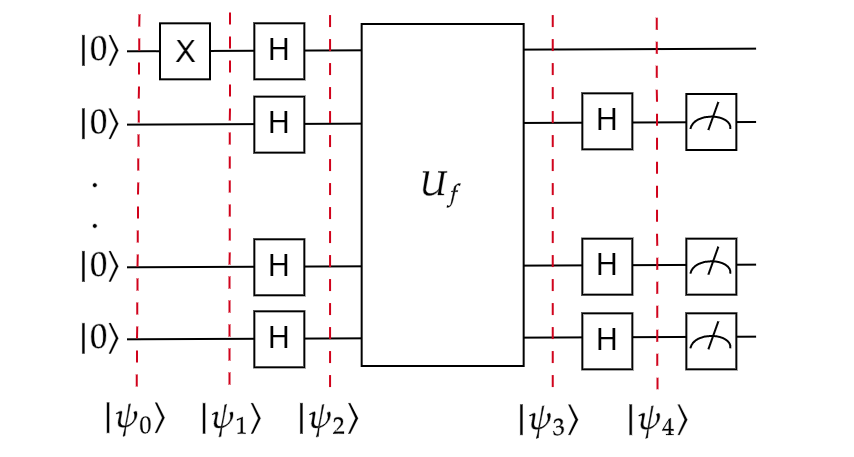

**Paso 1**

Se preparan dos registros cuánticos. El primero en un registro de $n$ qubits inicializado en $\ket{0}^{\otimes n}$, el segundo registro es un qubit inicializado en $\ket{1}$,

$$\ket{\psi_1} = \ket{0}^{\otimes n} \, \ket{1}$$

**Paso 2**

Se aplican compuertas Hadamard a cada qubit,

$$\ket{\psi_2} = \frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1} \ket{x} \otimes \ket{-}$$

$$\ket{\psi_2}=\frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \, \ket{x} \, \big(\ket{0}-\ket{1}\big)$$

**Paso 3**

De ahora en adelante podemos ignorar el qubit auxiliar y centrarnos en los qubits de entrada. Después de aplicar $U_f$ obtenemos el estado:

$$ \ket{\psi_{3,r_1}}= \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)} \ket{x} $$

Reemplacemos $f(x) = x \cdot s$ y reescribamos el estado de la siguiente manera:

$$ \ket{\psi_{3,r_1}} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{x \cdot s} \ket{x} $$

<div class="alert alert-block alert-success">
<strong>Recordatorio</strong>: 

$$ H^{\otimes n} \ket{x} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{x \cdot z} \ket{z}$$

También sabemos que el operador $H^{\otimes n}$ es su propio inverso. Por lo tanto, podemos decir que 

$$H^{\otimes n}\ket{a} = \ket{b} \Longleftrightarrow H^{\otimes n}\ket{b} = \ket{a}$$

Entonces, de hecho, $\ket{\psi_3}$ es el estado obtenido después de aplicar $H^{\otimes n}$ al estado $\ket{s}$.

**Paso 4**

Por lo tanto, después de aplicar $H^{\otimes n}$ a los qubits de entrada, obtenemos el estado final como

$$\ket{\psi_{4,r_1}} = \ket{s}.$$

Medimos los primeros $n$ qubits y observamos la cadena $s$ con probabilidad $1$.

### Implementación en Qiskit

La implementación es como la del algoritmo de _Deutsch – Jozsa_, ya que son los mismos pasos, salvo el contenido de $U_f$.

In [1]:
from qiskit import QuantumCircuit

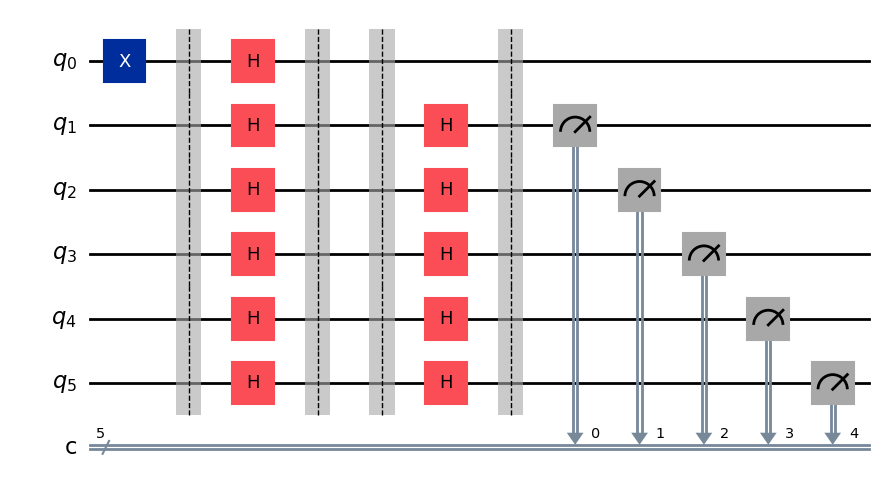

In [2]:
n = 5                                        # longitud de 's'

bv_circuit = QuantumCircuit(n+1, n)          # n+1=6 qubits, n=5 bits clásicos

##########
# Paso 1 #
##########

bv_circuit.x(0)                              # colocar el qubit q0 (segundo registro) en el estado |1>
bv_circuit.barrier()


##########
# Paso 2 #
##########

# Aplicar las compuertas H al primer registro
for qubit in range(1, n + 1):
    bv_circuit.h(qubit)

# Aplicar H al segundo registro, H|1> = |->
bv_circuit.h(0)

bv_circuit.barrier()


##########
# Paso 3 #
##########

# Aplicar U_f

bv_circuit.barrier()      # s = 00000, es decir, no se aplican compuertas


##########
# Paso 4 #
##########

# Aplicar nuevamente compuertas H al primer registro
for qubit in range(1, n + 1):
    bv_circuit.h(qubit)

bv_circuit.barrier()


##########
# Medir  #
##########

# Agregamos mediciones al primer registro
for i in range(n):
    bv_circuit.measure(i + 1, i)


bv_circuit.draw('mpl')

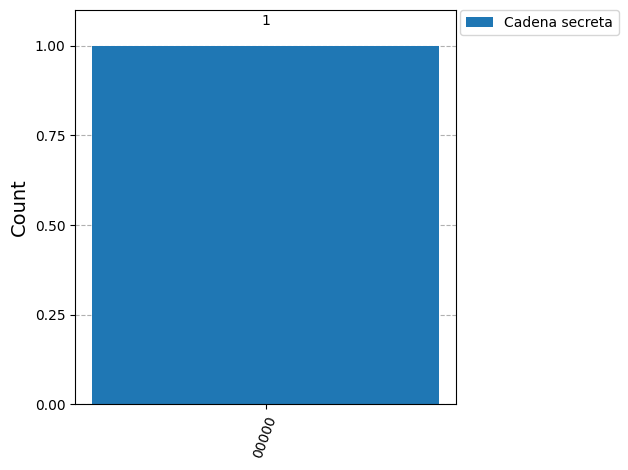

In [3]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

sim_basic = BasicSimulator()                       # usamos el simulador básico

# ejecutar el circuito, una sola vez es suficiente
job_sampler = sim_basic.run(bv_circuit, shots=1)   

conteos = job_sampler.result().get_counts()        # obtener los conteos

legend = ["Cadena secreta"]
plot_histogram([conteos], legend=legend)

<a id="2"></a>
# 2. Algoritmo de Grover

<a id="2.1"></a>
## 2.1. Inversión sobre la media

El paso conocido como "Inversion About the Mean" (_Inversión sobre la media_) en el contexto del algoritmo de Grover también se denomina "Amplificación de amplitud". Este paso es crucial para el funcionamiento del algoritmo porque incrementa sistemáticamente la amplitud (probabilidad) de los estados que son la solución al problema, mientras disminuye las de los otros estados.

Veamos un ejemplo sencillo para dar algunas ideas sobre cómo funciona el algoritmo.

Tenemos una lista de $N$ elementos.

Algunos de ellos están _marcados_.

Al principio cada uno tiene un valor de $1$.

Cada iteración tiene dos fases:

<ol>
     <li><b>Consulta</b>: En esta fase asumimos que se detecta cada elemento marcado y luego se invierte su signo.</li>
     <li><b>Inversión</b>: En esta fase, el valor de cada elemento se refleja sobre la media de todos los valores.</li>
</ol>

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>:

Consideremos $N=8$.

Supongamos que solo está marcado el cuarto elemento.

Podemos visualizar los valores de los elementos en la lista de la siguiente manera.

<BarContainer object of 8 artists>

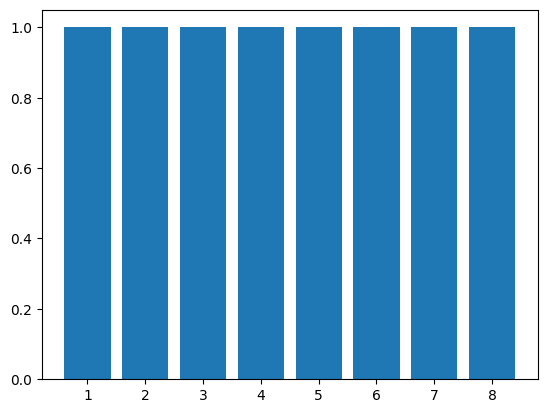

In [4]:
from matplotlib.pyplot import bar

labels = []
elements = []

for i in range(8):
    labels = labels + [i+1]
    elements = elements + [1]

# visualizar los valores de los elementos en la lista
bar(labels, elements)

Iteramos en un paso y visualizamos los valores de los elementos en la lista después de cada fase.

**1er paso - fase de consulta:**

<BarContainer object of 8 artists>

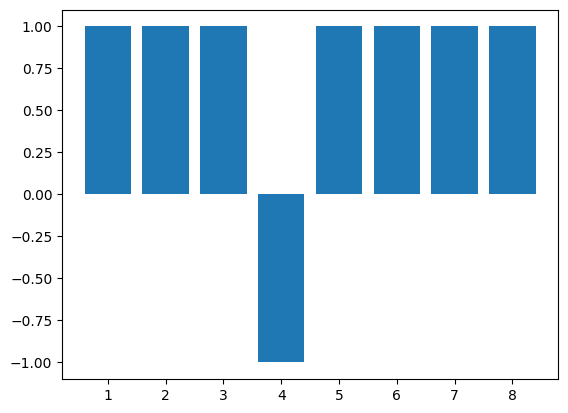

In [5]:
#
# 1er paso - consulta
#

# cambiar el signo del elemento marcado, es decir, multiplicarlo por -1
elements[3] = -1 * elements[3]                                                    # invertir el 4to elemento

# visualizar los valores de los elementos en la lista
bar(labels, elements)

**1er paso - fase de inversión:**

0.75


<BarContainer object of 8 artists>

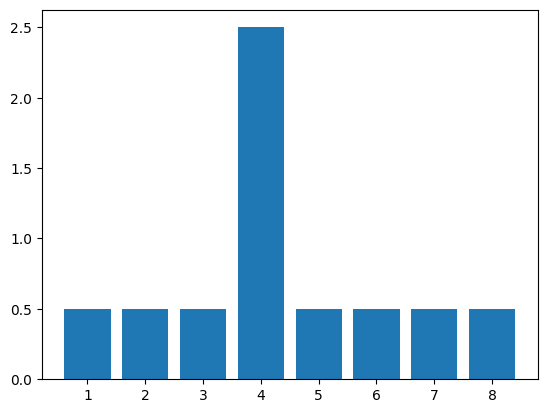

In [6]:
#
# 1er paso - inversión
#

# calcular la media de todos los valores

# luego refleja cada elemento sobre la media, por ejemplo:
# si la media es 0, entonces el reflejo de 3 es -3
# si la media es 1, entonces el reflejo de 3 es -1
# si la media es -1, entonces el reflejo de 3 es -5

# media de todos los valores
mean = sum(elements) / len(elements)
print(mean)

# reflexión sobre la media
for i in range(len(elements)):
    value = elements[i]
    new_value = mean - (value - mean)
    elements[i] = new_value

# visualizar los valores de los elementos en la lista
bar(labels, elements)

Iteramos un paso más y visualizamos los valores de los elementos en la lista después de cada fase.

**2do paso - fase de consulta:**

<BarContainer object of 8 artists>

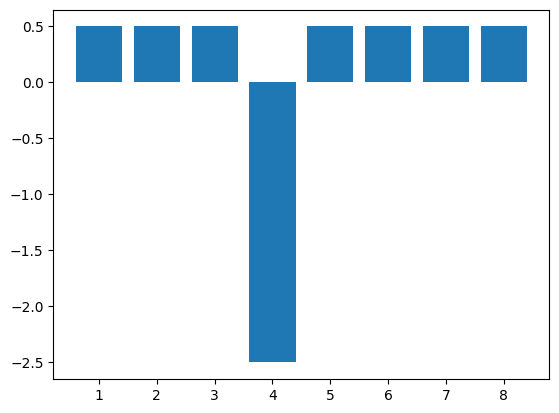

In [7]:
#
# 2do paso - consulta
#

# voltear el signo del elemento marcado (de nuevo)
elements[3] = -1 * elements[3]

# visualizar los valores de los elementos en la lista
bar(labels, elements)

**2do paso - fase de inversión:**

0.125


<BarContainer object of 8 artists>

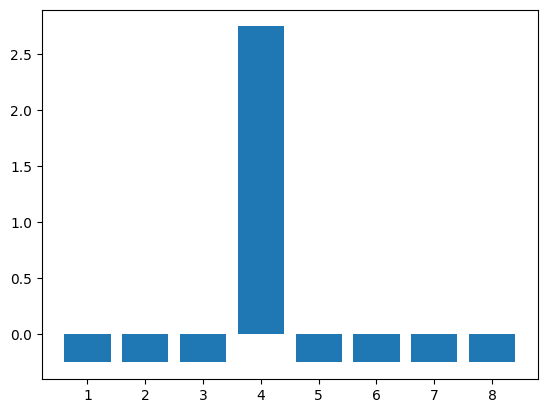

In [8]:
#
# 2do paso - inversión
#

# media de todos los valores
mean = sum(elements) / len(elements)
print(mean)

# reflexión sobre la media
for i in range(len(elements)):
    value = elements[i]
    new_value = mean - (value-mean)
    elements[i] = new_value

# visualizar los valores de los elementos en la lista
bar(labels, elements)

Repetimos tres pasos más y visualizamos los valores de los elementos en la lista al final.

<BarContainer object of 8 artists>

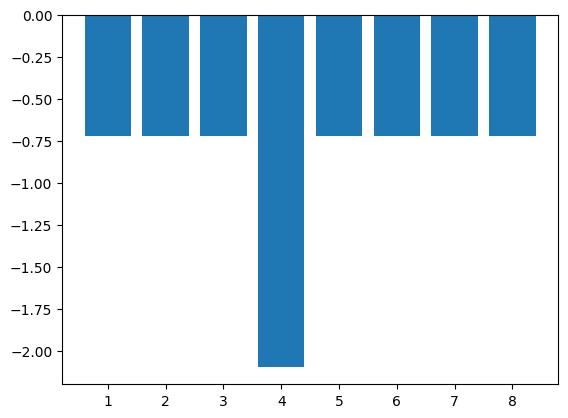

In [9]:
for i in range(3):
    # voltear el signo del elemento marcado
    elements[3] = -1 * elements[3]

    # media de todos los valores
    mean = sum(elements) / len(elements)

    # reflexión sobre la media
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (value-mean)
        elements[i] = new_value

# visualizar los valores de los elementos en la lista
bar(labels, elements)

Después de $5$ pasos en total, la diferencia entre el elemento marcado con el resto ya no es tan grande, como después del segundo paso ¿qué está pasando?

Para eso revisemos el comportamiento del elemento marcado, hagamos un par de funciones que nos ayuden a realizar las fases de cada paso de manera más sencilla y ejecutemos 20 pasos:

In [10]:
def query(elements=[1], marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]
    return elements

In [11]:
def inversion(elements=[1]):
    # media de todos los valores
    mean = sum(elements) / len(elements)

    # reflexión sobre la media
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (value - mean)
        elements[i] = new_value
    return elements

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1, 2.5, 2.75, 1.625, -0.3125, -2.09375, -2.828125, -2.1484375, -0.39453125, 1.556640625, 2.7294921875, 2.53759765625, 1.076904296875, -0.9222412109375, -2.46026611328125, -2.768157958984375, -1.6919708251953125, 0.23020172119140625, 2.037273406982422, 2.8257083892822266, 2.201289176940918]


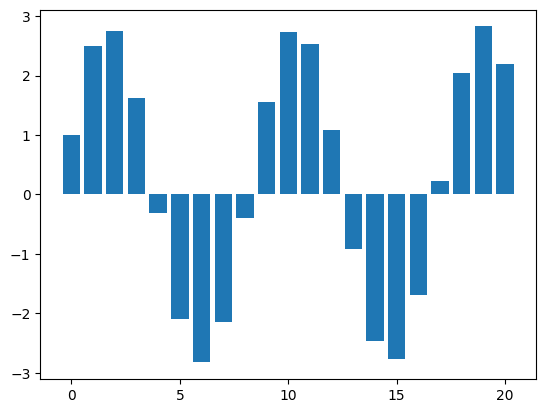

In [12]:
from matplotlib.pyplot import bar

# definir la lista de tamaño 8 en la que cada elemento tiene el valor de 1
elements = []
for i in range(8):
    elements = elements + [1]

# índice del elemento marcado
marked_elements = [3]             # el 4to, en este ejemplo

# definir la lista de iteraciones
iterations = []
# lista que almacena los valores del cuarto elemento después de cada paso
L = []

# los primeros valores
iterations.append(0)
L.append(elements[marked_elements[0]])

for step in range(20):
    # almacenar la iteración
    iterations.append(step+1)

    # realizar un paso (con sus dos fases)
    elements = query(elements, marked_elements)
    elements = inversion(elements)

    # almacenar el nuevo valor del cuarto elemento
    L.append(elements[marked_elements[0]])

# visualizar los valores del cuarto elemento después de cada iteración
bar(iterations, L)
print(iterations)
print(L)

### Cuándo deternerse

Cuando el número de elementos marcados es menor que el de elementos no marcados, las amplitudes de los elementos marcados comienzan a aumentar.

Luego, llegamos al primer pico tal que la probabilidad de observar un elemento marcado toma su valor máximo.

Después de pasar este punto, las amplitudes de los elementos marcados comienzan a disminuir.

Al iterar el algoritmo de búsqueda de Grover, debemos tener cuidado al detenernos.
> Porque, después de alcanzar un valor máximo, estas amplitudes comienzan a disminuir rápidamente, y después de alcanzar un valor mínimo, se amplifican nuevamente, y así sucesivamente.

Consideremos el ejemplo anterior: después de alcanza un máximo, luego se comienza a oscilar el valor de la amplitud del elemento marcado.

### Número de iteraciones

Si hay un solo elemento marcado en una lista de tamaño $N$, entonces $\pi \dfrac{\sqrt{N}}{4}$ iteraciones pueden dar el elemento marcado con alta probabilidad.

Si hay $k$ elementos marcados, entonces es mejor iterar $\pi \dfrac{\sqrt{\frac{N}{k}}}{4}$ veces.

Si se desconoce $k$, entonces podemos ejecutar el algoritmo con diferentes iteraciones. Una forma de hacerlo es iterar el algoritmo

$ \pi \dfrac{\sqrt{\frac{N}{1}}}{4}, \pi \dfrac{\sqrt{\frac{N}{2}}}{4}, \pi \dfrac{ \sqrt{\frac{N}{4}}}{4}, \pi \dfrac{\sqrt{\frac{N}{8}}}{4}, \ldots $ veces.

El número total de iteraciones seguirá siendo proporcional a $ \pi \dfrac{\sqrt{N}}{4} $, es decir, tendremos $ O \Bigg( \pi \dfrac{\sqrt{N}}{4} \Bigg) \sim O \Big(\sqrt{N}\Big)$ .

### Preservación de longitud

Notemos que cada fase es un operador (función) que preserva la longitud.

¿Crees que los operadores de consulta e inversión son lineales? Más específicamente, ¿podemos representarlos en forma de matriz?

La respuesta para el operador de consulta es fácil ya que solo cambia el signo de los elementos marcados, por lo que su forma matricial es muy similar a una matriz de identidad que tiene $-1$ en algunas de las entradas diagonales.

Para el caso del ejemplo anterior, en donde marcamos el 4° elemento de una lista de 8, esta matriz sería:

$$\text{Operador consulta}=\pmatrix{
     1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
     0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
     0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
     0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 \\
     0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
     0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
     0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
     0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
     }$$

Ahora, necesitamos restringir la lista para que represente un **estado cuántico**.

Por ejemplo si $N=8$, la lista con esa cantidad de elementos, sería $[a,a,a,a,a,a,a,a]$.

Si es un estado cuántico, entonces su longitud debe ser $1$, por lo que se debe cumplir que: $ 8a^2 = 1 $ y entonces $a = \frac{1}{\sqrt{8}} = \frac{1}{2\sqrt{2}}$.

En general, cualquier lista con $N$ elementos es $ \Big[ \frac{1}{\sqrt{N}},\ldots,\frac{1}{\sqrt{N}} \Big] $.

### Fases

El operador en cada fase es unitario (lineal).

La matriz unitaria en la fase de consulta depende de la entrada, pero el operador unitario en la fase de inversión no depende de la entrada.

**En la fase de consulta**, las amplitudes de los elementos marcados cambian de signo.

**En la fase de inversión**, para cada amplitud $x$, el nuevo valor se calcula como: $media - (x - media) = 2 \, media - x $.

La media de un vector columna de tamaño $N$ se puede calcular multiplicándola por el siguiente vector renglón por la izquierda:

$$\pmatrix{ \frac{1}{N} ~~ \frac{1}{N} ~~ \cdots ~~ \frac{1}{N}}$$

Al considerar todos los elementos de la lista, nos deja con una matriz. La **matriz (*de difusión*)** para la segunda fase (*operador de inversión*) debe ser entonces:

$$D = 2 \pmatrix{
     \frac{1}{N} & \cdots & \frac{1}{N} \\
     \vdots & \ddots & \vdots \\
     \frac{1}{N} & \cdots & \frac{1}{N} \\
     }- I$$

### Derivación del número de iteraciones (Opcional)

El número de iteraciones en el algoritmo de Grover está dado por la fórmula aproximada:

$$k \approx \frac{\pi}{4} \sqrt{N}$$

Este número de iteraciones maximiza la probabilidad de encontrar el elemento marcado en una base de datos de tamaño $N$. Veamos paso a paso cómo se llega a esta fórmula.

$$ $$

1. Consideremos un sistema cuántico con $N$ estados base $|x\rangle$, donde $x = 0, 1, 2, \dots, N-1$. El estado inicial es una superposición uniforme de todos los estados es el siguiente:

$$|s\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} |x\rangle$$

Supongamos que hay un solo elemento marcado, denotado como $|m\rangle$.

$$ $$

2. El algoritmo de Grover puede visualizarse como una rotación en un espacio de dos dimensiones, generado por los estados:

 - $|\alpha\rangle$: superposición de los estados no marcados
 - $|\beta\rangle = |m\rangle$: el estado marcado

Definimos:

$$|\alpha\rangle = \frac{1}{\sqrt{N-1}} \sum_{x \ne m} |x\rangle$$

Entonces, el estado inicial puede reescribirse como:

$$|s\rangle = \sqrt{\frac{N-1}{N}} |\alpha\rangle + \frac{1}{\sqrt{N}} |\beta\rangle$$

Si el ángulo entre $|s\rangle$ y $|\alpha\rangle$ es $\theta$, podemos reeescribir el estado como:

$$|s\rangle = \cos\theta |\alpha\rangle + \sin\theta |\beta\rangle$$

$$ $$

3. Ahora, calculamos el ángulo $\theta$ que determina la amplitud del estado marcado en la superposición inicial:

$$\sin \theta = \langle \beta | s \rangle = \frac{1}{\sqrt{N}}$$

Por lo tanto:

$$\theta = \arcsin\left( \frac{1}{\sqrt{N}} \right)$$

Para $N$ grande, 

$$\theta \approx \frac{1}{\sqrt{N}}$$

Esto usando la aproximación $\sin\theta\approx \theta$ cuando $\theta$ es pequeño.

$$ $$

4. El operador de Grover, llamémoslo $G$, realiza una rotación en el plano $(|\alpha\rangle, |\beta\rangle)$ por un ángulo $2\theta$ en cada iteración:

$$G = (2|s\rangle\langle s| - I) \cdot (I - 2|m\rangle\langle m|)$$

Después de $k$ iteraciones, el estado del sistema es:

$$| \psi_k \rangle = \sin\left( (2k + 1) \theta \right) |\beta\rangle + \cos\left( (2k + 1) \theta \right) |\alpha\rangle$$

$$ $$

5. Queremos maximizar la probabilidad de medir el estado marcado $|\beta\rangle$, lo que corresponde a maximizar $\sin^2\left( (2k + 1) \theta \right)$.

La máxima probabilidad ocurre cuando:

$$(2k + 1) \theta = \frac{\pi}{2}$$

Solucionando para $k$:

$$k = \frac{\pi}{4\theta} - \frac{1}{2}$$

Para $N$ grande, podemos aproximar $\theta$ y simplificar:

$$k \approx \frac{\pi}{4} \sqrt{N} - \frac{1}{2}$$

Como el término $-\frac{1}{2}$ es insignificante para $N$ grande, lo ignoramos:

$$k \approx \frac{\pi}{4} \sqrt{N}$$

$$ $$

> La fórmula $\frac{\pi}{4} \sqrt{N}$ se obtiene al determinar el número de iteraciones necesarias para rotar el estado inicial hasta que la amplitud del estado marcado sea máxima. Este número de iteraciones proporciona una alta probabilidad de encontrar el elemento marcado al medir el estado final del sistema cuántico.

<a id="2.2"></a>
## 2.2. Algoritmo de búsqueda de Grover

Supongamos que tenemos una lista de $N=2^n$ elementos, y uno de los elementos está marcado. La tarea es encontrar este elemento marcado.

Vamos a utilizar $n$ qubits. Al principio aplicamos Hadamard a cada qubit, por lo que ponemos nuestro estado cuántico en superposición. La amplitud de cada estado base $ \ket{0 \cdots 0}, \ldots, \ket{1 \cdots 1} $ se establece en $ \frac{1}{\sqrt{N}} $. Después de eso, iteramos el siguiente algoritmo varias veces:

- **Consulta**: aplicar un operador de consulta de Oracle a los qubits, lo que invierte el signo de la amplitud del estado que corresponde al elemento marcado.
- **Inversión**: aplicar la matriz de difusión, de modo que la amplitud de cada estado se refleja sobre la media de todas las amplitudes.

Veamos cómo podemos implementar las operaciones de consulta e inversión.

### Operación de consulta

#### Oráculo

Supongamos que existe una función $f:\{0,1\}^n \rightarrow \{0,1\}$ con las siguientes propiedades:

\begin{align*}
f(x)&=1 &\mbox{ si $x$ está marcado}\\
f(x)&=0 &\mbox{ en caso contrario}
\end{align*}

El algoritmo de Grover en realidad no busca una lista de elementos, pero dada la función $f$ con las propiedades anteriores, encuentra el elemento $x$ tal que $f(x)=1$.

$$ $$
Entonces accedemos a la lista consultando $f$, que se llama **oráculo** (oracle), también se le dice *caja negra*.

Normalmente, en el peor de los casos, tendríamos que consultar $f$ para todas las entradas posibles para encontrar $x$ que satisfaga $f(x)=1$, lo que implica una complejidad (de consulta) de $O(N)$.

El algoritmo de Grover puede realizar la misma tarea solo con $O\Big(\sqrt{N}\Big)$ consultas.

**Observación:** El algoritmo funciona si hay varios elementos marcados, pero asumimos que solo 1 elemento está marcado por simplicidad.

$$ $$
Aunque $f$ puede no ser reversible, se puede implementar de manera reversible utilizando la siguiente idea:

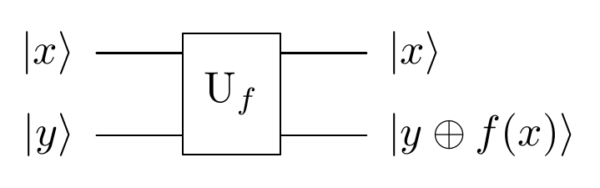

Aquí $U_f$, el operador cuántico correspondiente, se define de la siguiente manera, donde $\oplus$ denota la suma bit a bit módulo 2 ($XOR$).

$$U_f: \ket{y}\ket{x} \mapsto \ket{y \oplus f(x)}\ket{x} $$

Tengamos en cuenta que este mapeo es reversible. Cuando $\ket{y}=\ket{0}$, obtenemos exactamente $f(x)$ en el qubit ancilla.

#### Invertir el signo

En el resto de la discusión, asumiremos que tenemos un circuito cuántico que implementa el operador $U_f$. Se puede construir un operador que invierte el signo de la amplitud del estado correspondiente al elemento marcado $x$ usando **phase-kickback**.

Ahora supongamos que $\ket{y}=\ket{-} = \frac{1}{\sqrt{2}} (\ket{0} - \ket{1})$ e investiguemos el efecto del operador $U_f$.

\begin{align*}
U_f \ket{-}\ket{x} &= U_f \left( \frac{\ket{0}-\ket{1}}{\sqrt{2}} \right) \ket{x}\\
&= \frac{1}{\sqrt{2}} \left(U_f\ket{0}\ket{x}-U_f\ket{1}\ket{x}\right) \\
&= \frac{1}{\sqrt{2}} \left(\ket{f(x)\oplus 0}\ket{x} - \ket{f(x)\oplus 1}\ket{x}\right) \\
&= \frac{1}{\sqrt{2}}\left( \ket{f(x)}-\ket{f(x)\oplus 1} \right) \ket{x} \\
&= (-1)^{f(x)} \left( \frac{\ket{0}-\ket{1}}{\sqrt{2}} \right) \ket{x} \\
&= (-1)^{f(x)} \ket{-} \ket{x} \\
&= \ket{-} \;\;  \left[(-1)^{f(x)} \ket{x} \right] \\
\end{align*}

Así, tenemos la siguiente transformación:

$$ \ket{-}\ket{x} \xrightarrow{U_f} \ket{-} \;\;  \left[(-1)^{f(x)} \ket{x} \right] $$

Cuando $ f(x) = 1 $, vemos que una fase igual a $-1$ *se mueve al frente* (phase-kickback) del primer registro. Por lo tanto, al preparar el registro auxiliar en el estado $\ket{-}$ y aplicar $U_f$, obtenemos el efecto de cambio de signo deseado.

Tengamos en cuenta que incluso si no sabemos nada sobre $f$ (por eso se llama caja negra), podemos invertir el signo de la amplitud del elemento marcado haciendo una consulta a $f$ configurando el qubit ancilla (auxiliar) en $\ket{-}$.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: 
    
Sea $N=4$. Implementar la fase de consulta y verificar la matriz unitaria del operador de consulta. Tener en cuenta que estamos interesados en la parte superior izquierda $4 \times 4$ de la matriz, ya que las partes restantes se deben al qubit ancilla.

¿Puedes adivinar el elemento marcado mirando la matriz unitaria?

Ahora usemos el retroceso de fase para invertir el signo del elemento marcado:

- [*preparación*] Establecer el qubit auxiliar en $\ket{-}$ aplicando $X$ y $H$.
- Aplicar el operador $U_f$
- [*finalización*] Regresar el qubit auxiliar.

In [13]:
def Uf(circuit, qreg):
	circuit.ccx(qreg[0], qreg[1], qreg[2])

<IPython.core.display.Latex object>

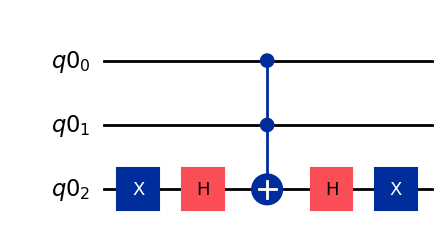

In [14]:
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, partial_trace
from qiskit.visualization import array_to_latex

qreg = QuantumRegister(3)
# No es necesario definir un registro clásico ya que no estamos midiendo

mycircuit = QuantumCircuit(qreg)

# registro ancilla
mycircuit.x(qreg[2])
mycircuit.h(qreg[2])

# aplicar oráculo
Uf(mycircuit, qreg)

# regresar el registro ancilla
mycircuit.h(qreg[2])
mycircuit.x(qreg[2])

op = Operator(mycircuit)
display(array_to_latex(op))

mycircuit.draw(output='mpl')

En el ejemplo anterior, observamos que el operador de consulta parece un operador identidad con una de las entradas igual a $-1$, que es responsable del cambio de signo.

$$\pmatrix{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1}$$

Al observar la matriz, podemos notar que el elemento marcado es $\ket{11}$. Tengamos en cuenta que, en general, no se puede echar un vistazo a la matriz correspondiente al operador de consulta y, por lo tanto, no es posible encontrar el elemento marcado después de una sola consulta.

### Operador de inversión

Para implementar la operación de inversión (difusión), necesitaremos un qubit adicional (ancilla). Así es como implementamos el operador de inversión:

- [*preparación*] Establecer el qubit ancilla en $\ket{-}$ aplicando $X$ y $H$.
- Aplicar $H$ a todos los qubits distintos del ancilla.
- Aplicar $X$ a todos los qubits distintos del ancilla.
- Aplicar operador $NOT$ controlado múltiple, donde el qubit ancilla es el objetivo y todos los demás qubits se utilizan para controlar.
- Aplicar $X$ al qubit ancilla.
- Aplicar $X$ a todos los qubits distintos del ancilla.
- Aplicar $H$ a todos los qubits distintos del ancilla.
- [*finalización*] Regresar el qubit ancilla aplicando $X$ y $H$.

#### ¿Por qué se eligen estas compuertas?

Ahora intentemos entender por qué se eligen estas compuertas. Recordemos el operador de inversión:

$$D = 2 \pmatrix{
     \frac{1}{N} & \cdots & \frac{1}{N} \\
     \vdots & \ddots & \vdots \\
     \frac{1}{N} & \cdots & \frac{1}{N} \\
     } - I$$

Este operador también se denomina **operador de difusión**.

Recordemos que el operador de difusión se puede expresar como $D=2\ket{u}\bra{u}-I$, donde $\ket{u}=H^{\otimes n}\ket{0}^{\otimes n}$ es el vector de igual superposición. Simplemente denotaremos $\ket{0}^{\otimes n}$ con el ket $\ket{\mathbf{0}}$.

- Para empezar, expresemos $D$ de la siguiente manera:

\begin{align*}
D&=2\ket{u}\bra{u}-I \\
&=2H^{\otimes n}\ket{\mathbf{0}}\bra{\mathbf{0}}H^{\otimes n}- I \\
&=2H^{\otimes n}\ket{\mathbf{0}}\bra{\mathbf{0}}H^{\otimes n}-H^{\otimes n}H^{\otimes n}\\
&=H^{\otimes n} (2\ket{\mathbf{0}}\bra{\mathbf{0}}H^{\otimes n}-H^{\otimes n}) \\
&=H^{\otimes n} (2\ket{\mathbf{0}}\bra{\mathbf{0}}-I)H^{\otimes n}
\end{align*}

*Al observar esta expresión, queda claro por qué tenemos compuertas $H$ al principio y al final*

- Ahora veamos el efecto de aplicar $2\ket{\mathbf{0}}\bra{\mathbf{0}}-I$ a cualquier estado arbitrario.

$$(2\ket{\mathbf{0}}\bra{\mathbf{0}}-I) \ket{x} = 2\ket{\mathbf{0}}\braket{\mathbf{0}}{ x}-\ket{x}$$

Si $\ket{x}=\ket{\mathbf{0}}$, ya que $\braket{\mathbf{0}}{\mathbf{0}}=1$, entonces $2\ket{\mathbf{0}}\braket{\mathbf{0}}{\mathbf{0}}-\ket{\mathbf{0}} = 2\ket{\mathbf{0}}-\ket{\mathbf{0}} = \ket{\mathbf{0}}$.

Si $\ket{x}\neq \ket{\mathbf{0}}$, ya que $\braket{\mathbf{0}}{x}=0$, entonces $2\ket{\mathbf{0}}\braket{\mathbf{0}}{x}-\ket{x}= 2\ket{\mathbf{0}}\cdot 0 -\ket{x} = -\ket{x}$.

Por lo tanto, el efecto de $2\ket{\mathbf{0}}\bra{\mathbf{0}}-I$ es invertir la amplitud de cualquier estado excepto de $\ket{\mathbf{0}}$.

- Ahora revisemos cómo podemos implementar este operador. Definamos la función $g$ de la siguiente manera y dejemos que $U_g$ sea el operador correspondiente.

\begin{align*}
g(x)&=0 &\mbox{ si $x$ es $\ket{\mathbf{0}}$ }\\
g(x)&=1 &\mbox{ de lo contrario}
\end{align*}

Configuremos el qubit ancilla para que sea $\ket{-}$ y apliquemos el operador $U_g$

\begin{align*}
U_g \ket{-} \ket{x} &= (-1)^{g(x)} \ket{-} \ket{x}
\end{align*}

Tengamos en cuenta que $U_g$ invierte las amplitudes de los estados distintos de $\ket{\mathbf{0}}$ e implementa exactamente $2\ket{\mathbf{0}}\bra{\mathbf{0}}-I$.

- ¿Cómo implementar $U_g$?

Consideremos $g'$ que es exactamente lo opuesto a $g$.

\begin{align*}
g'(x)&=1 &\mbox{ si $x$ es $\ket{\mathbf{0}}$ }\\
g'(x)&=0 &\mbox{ en caso contrario},
\end{align*}

Para implementar $U_{g'}$, debemos regresar $1$ cuando $x$ es $\ket{\bf 0}$, es decir, debemos aplicar la compuerta $X$ al qubit ancilla cuando todos los qubits de entrada están en el estado $0$.

*Es por eso que primero aplicamos la compuerta $X$ a los qubits de control y luego aplicamos una compuerta multi-control $NOT$ donde el objetivo es el qubit ancilla. Luego, regresamos el estado de los qubits de control.*

Acabamos de obtener el efecto opuesto de $g$: el qubit ancilla se establece en $1$ si todos los qubits de entrada están en estado $0$.

*Por lo tanto, aplicamos la compuerta $X$ al qubit ancilla para que la salida sea $1$ cuando $x$ no es $\ket{\bf{0}}$ y la salida es $0$ en caso contrario.*

### Probar la búsqueda de Grover

Ahora estamos listos para probar las operaciones y ejecutar la búsqueda de Grover. Supongamos que hay $4$ elementos en la lista e intentemos encontrar el elemento marcado.

El operador $U_f$ marcará un elemento
    
¿Qué estado observas con más frecuencia?

In [15]:
def Uf_11(circuit, qreg, ancilla):
	circuit.ccx(qreg[0], qreg[1], ancilla)

In [16]:
def inversion(circuit, quantum_reg, ancilla):

    # paso 1
    circuit.h(quantum_reg)

    # paso 2
    circuit.x(quantum_reg)

    # paso 3
    circuit.mcx(quantum_reg, ancilla)        # multi-cX gate -> params: control_qubits, target_qubit

    # paso 4
    circuit.x(quantum_reg)

    # paso 5
    circuit.x(ancilla)

    # paso 6
    circuit.h(quantum_reg)

In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

def grover(U_f, n=2, iterations=1):

    qreg = QuantumRegister(n, 'x')
    ancilla = QuantumRegister(1, 'ancilla')
    creg = ClassicalRegister(n, 'medición')
    
    grover_circuit = QuantumCircuit(qreg, ancilla, creg)
    
    # paso inicial - igual superposición
    grover_circuit.h(qreg)
    
    # iniciar ancilla en |->
    grover_circuit.x(ancilla)
    grover_circuit.h(ancilla)
    grover_circuit.barrier()
    
    # Iteraciones de Grover
    for i in range(iterations):
        
        # consulta (query)
        U_f(grover_circuit, qreg, ancilla)
        grover_circuit.barrier()
        
        # inversión
        inversion(grover_circuit, qreg, ancilla)
        grover_circuit.barrier()
    
    
    # regresar el ancilla a |0>
    grover_circuit.h(ancilla)
    grover_circuit.x(ancilla)
    grover_circuit.barrier()
    
    grover_circuit.measure(qreg, creg)
    
    shots = 2500
    
    sampler = StatevectorSampler()                                  # crear objeto de tipo StatevectorSampler

    job_sampler = sampler.run([grover_circuit], shots=shots)
    conteos = job_sampler.result()[0].data.medición.get_counts()    # obtener los conteos, "medición" es el nombre del registro clásico
    
    # imprimir el resultado
    for outcome in conteos:
        print("El elemento", outcome, "es observado con probabilidad", conteos[outcome]/shots)
    
    display(grover_circuit.draw(output='mpl'))

El elemento 11 es observado con probabilidad 1.0


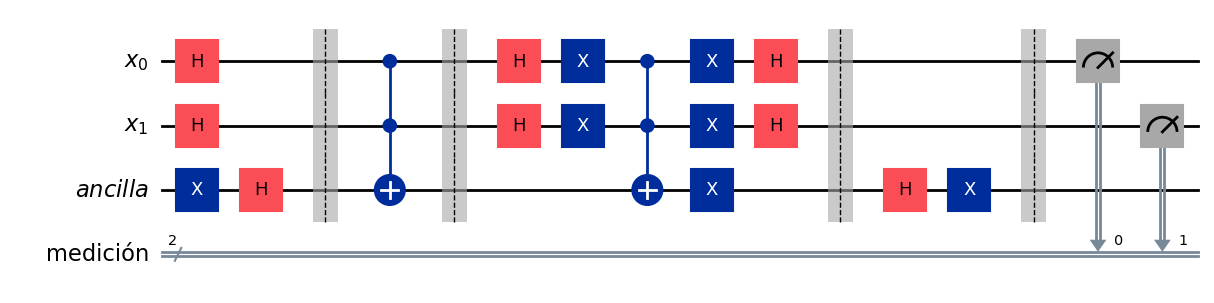

In [18]:
grover(Uf_11)

#### Otros oráculos

In [19]:
def Uf_10(circuit, qreg, ancilla):
    circuit.x(qreg[0])
    circuit.ccx(qreg[0], qreg[1], ancilla)
    circuit.x(qreg[0])

El elemento 10 es observado con probabilidad 1.0


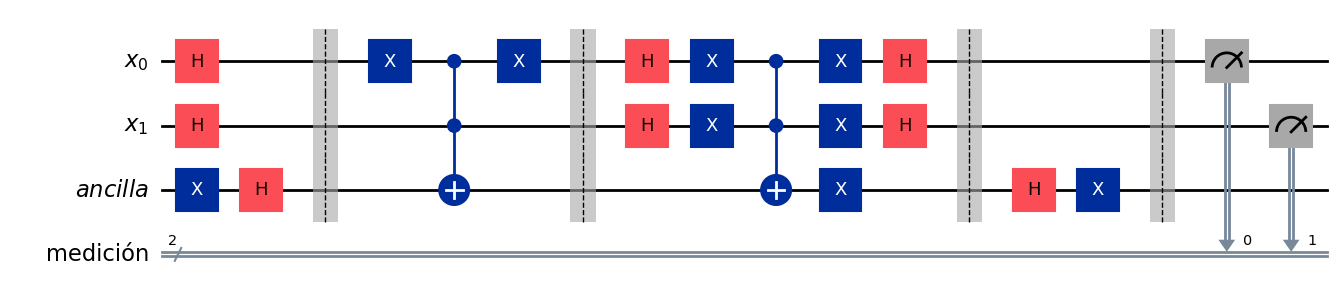

In [20]:
grover(Uf_10)

In [21]:
def Uf_01(circuit, qreg, ancilla):
    circuit.x(qreg[1])
    circuit.ccx(qreg[0], qreg[1], ancilla)
    circuit.x(qreg[1])

El elemento 01 es observado con probabilidad 1.0


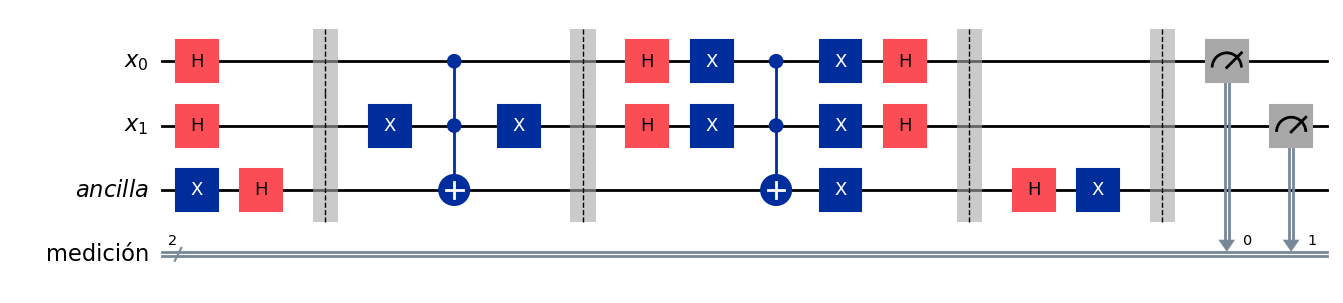

In [22]:
grover(Uf_01)

In [23]:
def Uf_00(circuit, qreg, ancilla):
    circuit.x(qreg[0])
    circuit.x(qreg[1])
    circuit.ccx(qreg[0], qreg[1], ancilla)
    circuit.x(qreg[0])
    circuit.x(qreg[1])

El elemento 00 es observado con probabilidad 1.0


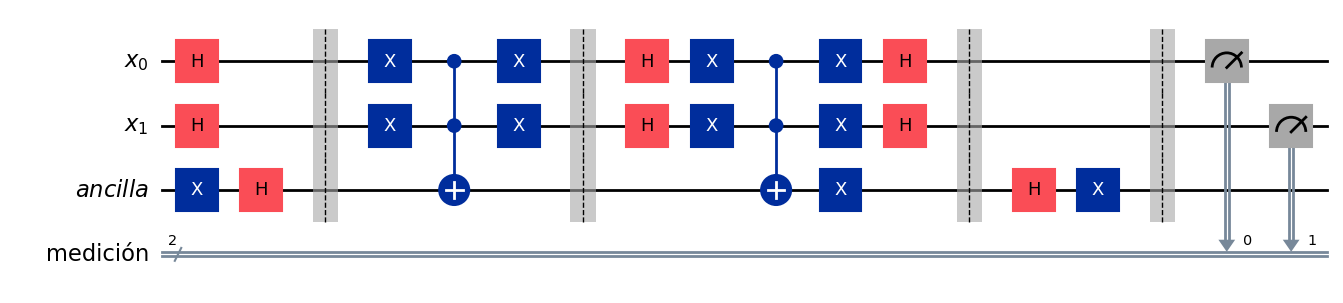

In [24]:
grover(Uf_00)

In [25]:
def Uf_001_010(circuit, qreg, ancilla):
    
    # 001
    circuit.x(qreg[1])
    circuit.x(qreg[2])
    circuit.mcx(qreg, ancilla)      # debido al uso de la compuerta MCX, es que se simula con 'StatevectorSampler' y no con 'BasicSimulator'
    circuit.x(qreg[1])
    circuit.x(qreg[2])

    # 010
    circuit.x(qreg[0])
    circuit.x(qreg[2])
    circuit.mcx(qreg, ancilla)
    circuit.x(qreg[0])
    circuit.x(qreg[2])

El elemento 001 es observado con probabilidad 0.4996
El elemento 010 es observado con probabilidad 0.5004


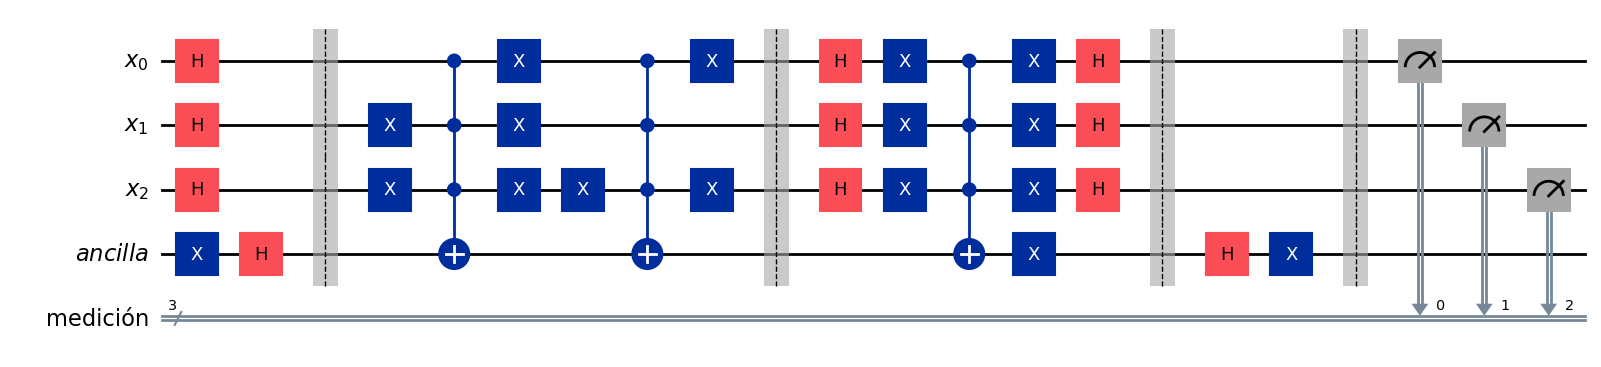

In [26]:
grover(Uf_001_010, n=3, iterations=1)

<a id="2.3"></a>
## 2.3. Ejemplos de uso

### Problema del vendedor viajero (TSP)

El algoritmo de Grover no se limita a una lista. Puede ser aplicado a cualquier espacio de búsqueda siempre que se pueda construir dicha función $f$. 

Consideremos la imagen a continuación. $A$, $B$, $C$ y $D$ son ciudades y los números representan la distancia entre ellas.

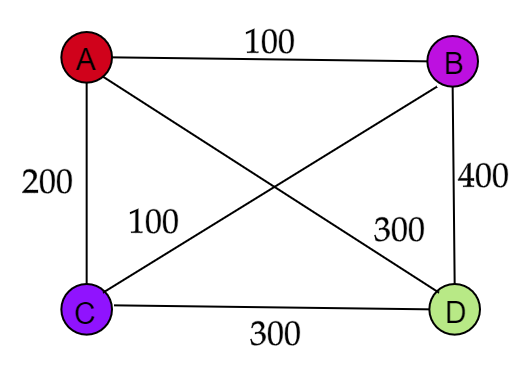

**Pregunta:** *Comenzando en $A$, ¿existe un camino de distancia $< 900$ que visite todas las ciudades exactamente una vez y regrese a $A$?*

Esto se conoce como la versión de decisión del Problema del Vendedor Viajero (Traveling Salesman Problem). En este ejemplo, el espacio de búsqueda consta de todas las rutas posibles, como $ABDCA$, $ACBDA$, $ABCDA$, etc. y nuestro objetivo es encontrar la ruta cuya distancia total sea $< 900$.

Revisemos $ABCDA$. La distancia total es $800$, lo que satisface la condición. Si deseamos diseñar $f$ para este problema, $f(\text{ABCDA})=1$ y $f(x)=0$ para todas las demás rutas.

**¿Cómo se puede construir tal $f$?**

Sumemos las distancias entre cada par de ciudades y asignemos $1$ si la distancia total es menor que $900$ y $0$ en caso contrario. Tengamos en cuenta que no necesitamos saber nada sobre la solución para implementar $f$.

Por supuesto, deberíamos poder diseñar tal $f$ en el entorno cuántico si deseamos aplicar la búsqueda de Grover y esto no siempre es una tarea fácil.

Por ejemplo, en este caso, se pueden hacer las asignaciones:

- $000$: $A \rightarrow B \rightarrow C \rightarrow D \rightarrow A$ (distancia 800, cumple la condición)
- $001$: $A \rightarrow B \rightarrow D \rightarrow C \rightarrow A$ (distancia 1000, no cumple)
- $010$: $A \rightarrow C \rightarrow B \rightarrow D \rightarrow A$ (distancia 1000, no cumple)
- $011$: $A \rightarrow C \rightarrow D \rightarrow B \rightarrow A$ (distancia 1000, no cumple)
- $100$: $A \rightarrow D \rightarrow B \rightarrow C \rightarrow A$ (distancia 1000, no cumple)
- $101$: $A \rightarrow D \rightarrow C \rightarrow B \rightarrow A$ (distancia 800, cumple la condición)

Por lo tanto, queremos que el oráculo marque los estados $|000\rangle$ y $|101\rangle$ (las rutas que cumplen con la condición de distancia < 900).

**¿Cómo ayuda la búsqueda de Grover en este problema?**

Verificar todas las rutas una por una es un procedimiento largo. Pero dada una ruta, podemos comprobar fácilmente si la distancia total cumple la condición. En lugar de comprobar todas las rutas una por una y consultar $f$ para cada ruta, basta con realizar $\sqrt{N}$ consultas si utilizamos la búsqueda de Grover.

Consulta este [enlace](https://github.com/quantum-challenge/2019/blob/master/problems/final/Final_en.ipynb) para ver otro ejemplo.

### Algunas aplicaciones

- **Logística y Distribución**: Esta es quizás la aplicación más directa del TSP. Se utiliza para optimizar las rutas de entrega de mercancías, desde paquetería hasta distribución de alimentos, minimizando la distancia total recorrida o el tiempo total de viaje. Esto se traduce en ahorros significativos en costos de combustible y tiempo.

- **Fabricación y Ensamblaje**: En entornos de producción, especialmente aquellos que involucran procesos de corte como la fabricación de ropa o el corte de metales, el TSP puede ayudar a minimizar el desplazamiento de las herramientas de corte, lo cual reduce el tiempo de producción y el desgaste de las máquinas.

- **Diseño de Circuitos Electrónicos**: El TSP se aplica en el diseño de circuitos impresos (PCB) y circuitos integrados (IC) para minimizar la longitud total de las conexiones eléctricas, lo que puede afectar directamente la velocidad y eficiencia del circuito.

- **Genómica**: En el secuenciamiento de ADN y otras formas de análisis genómico, el TSP ayuda a ordenar fragmentos de ADN en una secuencia que represente la disposición más probable en el genoma, facilitando su interpretación y análisis.

- **Astronomía**: Se utiliza para optimizar la secuencia de observaciones de los telescopios, con el fin de minimizar el tiempo de movimiento del telescopio entre diferentes puntos de observación en el cielo.

- **Programación de Tareas**: Aunque menos intuitivo, el TSP también se aplica en la programación de tareas donde se debe determinar el orden más eficiente para realizar actividades que tienen ciertas restricciones de precedencia y costos asociados.

$$ $$
$$ $$

### Problema del máximo corte (Max-Cut Problem)

Consideremos el siguiente grafo:

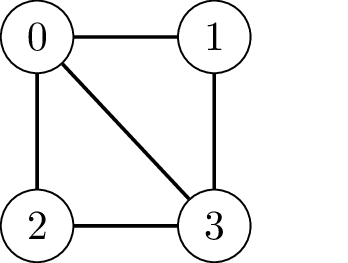

El grafo tiene cinco aristas en total. 

Colorearemos cada vértice con azul o rojo y contaremos el número de aristas que conectan vértices con diferentes colores. 

En el siguiente ejemplo, hay dos aristas que conectan vértices y que están coloreadas con diferentes colores (azul y rojo):

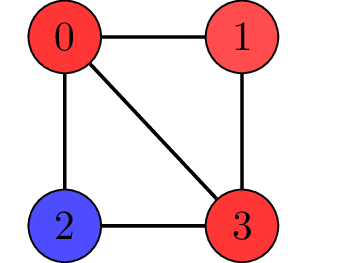

Por otro lado, en el siguiente ejemplo, hay cuatro aristas que conectan los vértices coloreados con diferentes colores, que de hecho es el **máximo** para un grafo con cuatro vértices.

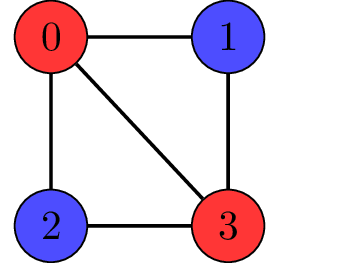

El problema de encontrar el número máximo de aristas para que sus puntos finales se coloreen con diferentes colores se conoce como **problema de corte máximo**. Alternativamente, el objetivo es dividir los vértices del grafo en dos conjuntos disjuntos (lo que se llama corte) de modo que el número de aristas entre los dos conjuntos sea máximo. El tamaño del corte se define como el número de aristas entre dos conjuntos.

Nos centraremos en la versión de decisión de este problema que se define de la siguiente manera:

Para un grafo dado $G$, el problema es determinar si existe un corte de tamaño al menos igual a $k$.

Resulta que este problema es un desafío (de hecho, es **NP**-completo). Hay $2^n$ posibles colores, por lo que una búsqueda trivial (fuerza bruta) verifica *cada uno* de estos casos en el peor de los casos. Se puede resolver este problema más rápido usando el algoritmo de búsqueda de Grover, aproximadamente haciendo $\pi\sqrt{2^n}/4 \approx 0.8 \times 1.414^n$ consultas al *oracle*.

### Algunas aplicaciones

- **Diseño de Circuitos Electrónicos**: El problema de máximo corte se utiliza para el diseño y la optimización de circuitos VLSI (Very Large Scale Integration). En este contexto, se trata de minimizar el número de conexiones entre diferentes chips o diferentes partes de un chip, lo cual puede traducirse en un problema de máximo corte donde cada corte representa una disminución en el número de conexiones entre componentes.

- **Ciencia de Materiales**: En la física de materiales, especialmente en el estudio de sistemas magnéticos como los imanes, el problema del máximo corte puede usarse para modelar y optimizar la configuración de espines en un material, donde el objetivo es maximizar la diferencia entre conexiones de espines opuestos.

- **Clustering en Análisis de Datos**: El máximo corte también se puede aplicar en el clustering de datos para dividir un conjunto de datos en dos grupos de modo que las diferencias entre los grupos sean máximas. Esto es útil en análisis de redes sociales, biología computacional (por ejemplo, en la clasificación de genes o proteínas), y en la segmentación de mercados.

- **Planificación de Redes**: En la planificación de redes de telecomunicaciones o de transporte, el problema de máximo corte puede ayudar a determinar la forma más eficiente de segmentar una red para optimizar ciertos criterios de rendimiento o seguridad.

- **Finanzas**: En el sector financiero, el máximo corte puede ser empleado para la diversificación de portafolios, buscando minimizar el riesgo por medio de la separación de activos en diferentes categorías que maximicen la disimilitud en sus rendimientos.

$$ $$

<a id="3"></a>
# 3. Grover en las SpinQ

Podemos implementar Grover en las SpinQ.

Notemos que a nivel de simulación, con `spinqit` podemos usar más de $2$ qubits.

Podemos implementar el algoritmo de búsqueda de Grover con `spinqit`, para ello nos apoyamos de la clase `AmplitudeAmplification` que permitirá efectuar ese paso del algoritmo.

Primero veamos un ejemplo para $2$ qubits:

In [ ]:
from spinqit import get_basic_simulator, BasicSimulatorConfig, get_compiler, Circuit, draw
from spinqit import AmplitudeAmplification, GateBuilder, RepeatBuilder
from spinqit import H, X, Z
from spinqit.primitive import MultiControlledGateBuilder

circ = Circuit()
q = circ.allocateQubits(2)

hbuilder = RepeatBuilder(H, 2)
circ << (hbuilder.to_gate(), q)

# Construir el oráculo para encontrar '01'
oracle_builder = GateBuilder(2)
oracle_builder.append(X, [0])

mcz_builder = MultiControlledGateBuilder(1, gate=Z)              # usa compuertas equivalentes (https://arxiv.org/pdf/quant-ph/9503016)
oracle_builder.append(mcz_builder.to_gate(), list(range(2)))

oracle_builder.append(X, [0])

grover = AmplitudeAmplification(oracle_builder.to_gate(), q)     # se aprovecha esta clase que ya existe en el paquete
circ.extend(grover.build())

comp = get_compiler()
engine = get_basic_simulator()

exe = comp.compile(circ, 0)
draw(exe)

config = BasicSimulatorConfig()
config.configure_shots(1024)
result = engine.execute(exe, config)

# Resultados
print(result.counts)

Ejemplo para $4$ qubits:

In [ ]:
from spinqit import get_compiler, Circuit, draw
from spinqit import AmplitudeAmplification, GateBuilder, RepeatBuilder
from spinqit import H, X, Z
from spinqit.primitive import MultiControlledGateBuilder

circ = Circuit()
q = circ.allocateQubits(4)

hbuilder = RepeatBuilder(H, 4)
circ << (hbuilder.to_gate(), q)

# Construir el oráculo para encontrar '1100'
oracle_builder = GateBuilder(4)
oracle_builder.append(X, [2])
oracle_builder.append(X, [3])

mcz_builder = MultiControlledGateBuilder(3, gate=Z)
oracle_builder.append(mcz_builder.to_gate(), list(range(4)))

oracle_builder.append(X, [2])
oracle_builder.append(X, [3])

grover = AmplitudeAmplification(oracle_builder.to_gate(), q)
circ.extend(grover.build())

comp = get_compiler()
engine = get_basic_simulator()

exe = comp.compile(circ, 0)
draw(exe)

config = BasicSimulatorConfig()
config.configure_shots(1024)
result = engine.execute(exe, config)

# Resultados
print(result.counts)

$$ $$
La clase `MultiControlledGateBuilder` se usa para crear las compuertas multicontrol necesarias, y esta es generada con varias compuertas, cuyas equivalencias están basadas en el artículo:
- *Elementary gates for quantum computation*, **Barenco, Adriano and Bennett, Charles H. and Cleve, Richard and DiVincenzo, David P. and Margolus, Norman and Shor, Peter and Sleator, Tycho and Smolin, John A. and Weinfurter, Harald**. Phys. Rev. A 52, 3457 – Published 1 November 1995. [[Phys. Rev. A](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.52.3457)][[arXiv](https://arxiv.org/pdf/quant-ph/9503016)]

In [ ]:
from spinqit import get_compiler, Circuit, draw
from spinqit import AmplitudeAmplification, GateBuilder, RepeatBuilder
from spinqit import H, X, Z, Y
from spinqit.primitive import MultiControlledGateBuilder
from math import pi

circ = Circuit()
q = circ.allocateQubits(2)

mcz_builder = MultiControlledGateBuilder(1, gate=Z)

circ << (mcz_builder.to_gate(), q)

comp = get_compiler()
engine = get_basic_simulator()

exe = comp.compile(circ, 0)
draw(exe)

config = BasicSimulatorConfig()
config.configure_shots(1024)
result = engine.execute(exe, config)

# Run
print(result.counts)

Notemos que la implementación de Grover es un poco diferente a la tradicional, por ejemplo se usa la compuerta $Z$ multicontrolada en lugar de la $X$ multicontrolada; por otro lado, la implementación del paso iterativo de aplificación de amplitud (uso de la clase `AmplitudeAmplification`) se ve modificada para usar esta compuerta multicontrolada.

$$ $$

`spinqit` también provee una clase llamada `QSearching` que permite determinar cuál es el elemento máximo (o el mínimo) en una lista de números. 

Internamente, esta clase usa el algoritmo de Grover, puedes ver su implementeación en el repositorio del paquete ([aquí](https://github.com/SpinQTech/SpinQit/blob/main/spinqit/algorithm/grover_seach.py)).

In [ ]:
from spinqit.algorithm import QSearching

dataset = [2, 3, 1, 4, 5, 6, 7, 15]
seed = 330

max_searcher = QSearching(seed=seed)
max_idx = max_searcher.search(dataset, show=True)

print()

min_searcher = QSearching('min', seed=seed)
min_idx = min_searcher.search(dataset, show=True)


<a id="4"></a>
# 4. Práctica 5

La Tarea deberá ser entregada en un Jupyter notebook, debe ser uno nuevo (no se puede usar este), el archivo debe ser subido al Google Classroom.

1. Determina el valor de la cadena oculta `s`:
   1. Ejecuta la siguiente celda de código, esta definirá una función llamada `bv_oracle()` que no recibe parámetros y devuelve un circuito cuántico que codifica una cadena `s` de $5$ bits.
      1. `bv_oracle()` representa $U_f$ en el algoritmo de Bernstein–Vazirani.
      2. Dibuja el circuito que regresa la función `bv_oracle()`.
   2. Implementa todo el algoritmo de Bernstein–Vazirani para determinar la cadena `s`.
      1. Considera que el qubit de más a la derecha ($q_0$) es el qubit auxiliar.
      2. Comprueba la estructura del circuito de $U_f$ dibujando tu circuito. ¿Puedes comprobar si tu resultado es correcto (o no) solo observando este circuito?
      3. Usa el parámetro `inplace=True` del método `compose()` de la clase `QuantumCircuit` para agregar el circuito del oráculo en el punto deseado (paso 3).
   3. Realiza la simulación del circuito usando la clase `BasicSimulator` (como en el ejemplo de este Lab5).
       - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
   4. Responde claramente cuál es la cadena oculta `s`.
       - Usa una celda de markdown, en donde escribas la cadena $s$ tu mismo(a) a modo de conclusión.

##### Celda oculta que define la función `bv_oracle()`

No olvides ejecutar la siguiente celda de código ([ofuscado](https://es.wikipedia.org/wiki/Ofuscaci%C3%B3n#Motivaci%C3%B3n)) para cargar la función del Oracle.

In [ ]:
exec(bytes.fromhex('0a66726f6d207169736b697420696d706f7274205175616e74756d436972637569740a0a6465662062765f6f7261636c6528293a0a2020202073203d20223131303130220a202020206e203d206c656e2873290a2020202073203d20735b3a3a2d315d202320726576657274696d6f73206c6120636164656e612079612071756520735f3020657374c3a12061206c6120697a7175696572646120736567c3ba6e20507974686f6e2c7920656e206c61206465726563686120736567c3ba6e205169736b69740a0a2020202063697263756974203d205175616e74756d43697263756974286e202b2031290a20202020636972637569742e6261727269657228290a0a20202020666f72206920696e2072616e6765286e293a0a2020202020202020696620735b695d203d3d202731273a0a202020202020202020202020636972637569742e63782869202b20312c2030290a0a20202020636972637569742e6261727269657228290a2020202072657475726e20636972637569740a20202020'))

#### 

2. Realiza el algoritmo de Grover para $n=5$.
   1. Haz una función de oráculo que marque los elementos $|01100\rangle$, $|11001\rangle$ y $|01010\rangle$.
   2. Ejecuta el algorimto completo y comprueba que dichos elementos fueron encontrados por el algoritmo de búsqueda de Grover.
      - Realiza los mismos pasos que en el ejemplo de este Lab5.
   4. Recuerda que debes determinar el número apropiado de iteraciones a usar en tu algoritmo.
   5. Realiza la simulación del circuito usando la clase `StatevectorSampler` (como en el ejemplo de este Lab5).
      - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
     
$$ $$

3. **[Opcional]** Descubre los elementos marcados en un circuito más grande.
   
   Para este ejercicio se provee una gran parte de la implementación del algoritmo de Grover, deberás completar algunos aspectos solamente (fíjate en las líneas con comentarios que comienzan con `???`).
   
   Ejecuta la siguiente celda de código, esta definirá dos funciones:
   - `big_oraculo(circuito, qreg)`: define un oráculo que marca **dos** elementos, recibe el circuito al que se le aplicará el oráculo y el registro cuántico que contiene todos los qubits del circuito.
   - `big_inversion(circuito, qreg)`: define el operador de inversión para este caso particular, recibe el circuito al que se le aplicará la inversión y el registro cuántico que contiene todos los qubits del circuito.
   
   
   Contesta a los siguientes incisos:
   1. Determina el tamaño total del espacio de búsqueda, es decir, el valor de $N$.
      1. Observa cómo se está creando el circuito, se crean dos registros, uno cuántico y otro clásico, el tamaño del espacio de búsqueda es lo que medimos al final.
      2. Escribe en una celda de markdown el valor de $N$ de manera explícita, para que quede claro cual es tu respuesta a este inciso.
   2. Encuentra el número óptimo de iteraciones.
      1. Una vez que determines $N$ podrás calcular la cantidad de iteraciones.
      2. Toma encuenta que el oráculo marca $2$ elementos, este valor te sirve para calcular la cantidad de iteraciones.
      3. Escribe en una celda de markdown la cantidad de iteraciones que calculaste, así como qué hiciste para determinar esa cantidad.
   3. Realiza la simulación del circuito usando la clase `StatevectorSampler` (como en el ejemplo de este Lab5).
      1. Debes crear el objeto correcto.
      2. Debes obtener los conteos de la ejecución.
      - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
   4. Indica cuáles son los elementos que encuentra el algoritmo de Grover.
      1. Revisa lo que imprime el código al final y deberás notar claramente $2$ elementos con una cantidad mayor de conteos.
      2. Indica explícitamente en una celda de markdown cuáles son los elementos encontrados.
      3. Convierte las cadenas de bits en su equivalente en decimal, también escribe este equivalente en markdown.

$$ $$

##### Celda oculta que define las funciones `big_oraculo(circuito, qreg)` y `big_inversion(circuito, qreg)`

No olvides ejecutar la siguiente celda de código ([ofuscado](https://es.wikipedia.org/wiki/Ofuscaci%C3%B3n#Motivaci%C3%B3n)) para cargar las funciones que definen el oráculo y el operador de inversión.

In [ ]:
exec(bytes.fromhex('0a646566206269675f6f726163756c6f286369726375697439392c207175616e74756d5f726567293a0a202020206e756d626572733d5b31322c2034355d0a20202020666f72206e756d62657220696e206e756d626572733a0a20202020202020206966286e756d6265722532203d3d2030293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b305d290a20202020202020206966286e756d6265722534203c2032293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b315d290a20202020202020206966286e756d6265722538203c2034293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b325d290a20202020202020206966286e756d626572253136203c2038293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b335d290a20202020202020206966286e756d626572253332203c203136293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b345d290a20202020202020206966286e756d626572253634203c203332293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b355d290a20202020202020206966286e756d62657225313238203c203634293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b365d290a20202020202020206966286e756d62657225323536203c20313238293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b375d290a20202020202020206966286e756d62657225353132203c20323536293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b385d290a20202020202020206966286e756d626572203c20353132293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b395d290a0a20202020202020206369726375697439392e636378287175616e74756d5f7265675b305d2c207175616e74756d5f7265675b315d2c207175616e74756d5f7265675b31385d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b325d2c207175616e74756d5f7265675b335d2c207175616e74756d5f7265675b31315d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b345d2c207175616e74756d5f7265675b355d2c207175616e74756d5f7265675b31325d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b365d2c207175616e74756d5f7265675b375d2c207175616e74756d5f7265675b31335d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b385d2c207175616e74756d5f7265675b395d2c207175616e74756d5f7265675b31345d290a0a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31385d2c207175616e74756d5f7265675b31315d2c207175616e74756d5f7265675b31355d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31325d2c207175616e74756d5f7265675b31335d2c207175616e74756d5f7265675b31365d290a0a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31355d2c207175616e74756d5f7265675b31365d2c207175616e74756d5f7265675b31375d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31345d2c207175616e74756d5f7265675b31375d2c207175616e74756d5f7265675b31305d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31355d2c207175616e74756d5f7265675b31365d2c207175616e74756d5f7265675b31375d290a0a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31325d2c207175616e74756d5f7265675b31335d2c207175616e74756d5f7265675b31365d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31385d2c207175616e74756d5f7265675b31315d2c207175616e74756d5f7265675b31355d290a0a20202020202020206369726375697439392e636378287175616e74756d5f7265675b385d2c207175616e74756d5f7265675b395d2c207175616e74756d5f7265675b31345d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b365d2c207175616e74756d5f7265675b375d2c207175616e74756d5f7265675b31335d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b345d2c207175616e74756d5f7265675b355d2c207175616e74756d5f7265675b31325d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b325d2c207175616e74756d5f7265675b335d2c207175616e74756d5f7265675b31315d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b305d2c207175616e74756d5f7265675b315d2c207175616e74756d5f7265675b31385d290a0a20202020202020206966286e756d6265722532203d3d2030293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b305d290a20202020202020206966286e756d6265722534203c2032293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b315d290a20202020202020206966286e756d6265722538203c2034293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b325d290a20202020202020206966286e756d626572253136203c2038293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b335d290a20202020202020206966286e756d626572253332203c203136293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b345d290a20202020202020206966286e756d626572253634203c203332293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b355d290a20202020202020206966286e756d62657225313238203c203634293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b365d290a20202020202020206966286e756d62657225323536203c20313238293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b375d290a20202020202020206966286e756d62657225353132203c20323536293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b385d290a20202020202020206966286e756d626572203c20353132293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b395d290a20202020'))

exec(bytes.fromhex('0a646566206269675f696e76657273696f6e286369726375697439392c207175616e74756d5f726567293a0a20202020666f72206920696e2072616e6765283130293a0a20202020202020206369726375697439392e68287175616e74756d5f7265675b695d290a20202020202020206369726375697439392e78287175616e74756d5f7265675b695d290a0a202020206369726375697439392e636378287175616e74756d5f7265675b305d2c207175616e74756d5f7265675b315d2c207175616e74756d5f7265675b31385d290a202020206369726375697439392e636378287175616e74756d5f7265675b325d2c207175616e74756d5f7265675b335d2c207175616e74756d5f7265675b31315d290a202020206369726375697439392e636378287175616e74756d5f7265675b345d2c207175616e74756d5f7265675b355d2c207175616e74756d5f7265675b31325d290a202020206369726375697439392e636378287175616e74756d5f7265675b365d2c207175616e74756d5f7265675b375d2c207175616e74756d5f7265675b31335d290a202020206369726375697439392e636378287175616e74756d5f7265675b385d2c207175616e74756d5f7265675b395d2c207175616e74756d5f7265675b31345d290a202020200a202020206369726375697439392e636378287175616e74756d5f7265675b31385d2c207175616e74756d5f7265675b31315d2c207175616e74756d5f7265675b31355d290a202020206369726375697439392e636378287175616e74756d5f7265675b31325d2c207175616e74756d5f7265675b31335d2c207175616e74756d5f7265675b31365d290a202020200a202020206369726375697439392e636378287175616e74756d5f7265675b31355d2c207175616e74756d5f7265675b31365d2c207175616e74756d5f7265675b31375d290a202020206369726375697439392e636378287175616e74756d5f7265675b31345d2c207175616e74756d5f7265675b31375d2c207175616e74756d5f7265675b31305d290a202020206369726375697439392e636378287175616e74756d5f7265675b31355d2c207175616e74756d5f7265675b31365d2c207175616e74756d5f7265675b31375d290a202020200a202020206369726375697439392e636378287175616e74756d5f7265675b31325d2c207175616e74756d5f7265675b31335d2c207175616e74756d5f7265675b31365d290a202020206369726375697439392e636378287175616e74756d5f7265675b31385d2c207175616e74756d5f7265675b31315d2c207175616e74756d5f7265675b31355d290a202020200a202020206369726375697439392e636378287175616e74756d5f7265675b385d2c207175616e74756d5f7265675b395d2c207175616e74756d5f7265675b31345d290a202020206369726375697439392e636378287175616e74756d5f7265675b365d2c207175616e74756d5f7265675b375d2c207175616e74756d5f7265675b31335d290a202020206369726375697439392e636378287175616e74756d5f7265675b345d2c207175616e74756d5f7265675b355d2c207175616e74756d5f7265675b31325d290a202020206369726375697439392e636378287175616e74756d5f7265675b325d2c207175616e74756d5f7265675b335d2c207175616e74756d5f7265675b31315d290a202020206369726375697439392e636378287175616e74756d5f7265675b305d2c207175616e74756d5f7265675b315d2c207175616e74756d5f7265675b31385d290a0a20202020666f72206920696e2072616e6765283130293a0a20202020202020206369726375697439392e78287175616e74756d5f7265675b695d290a20202020202020206369726375697439392e68287175616e74756d5f7265675b695d290a202020200a202020206369726375697439392e78287175616e74756d5f7265675b31305d290a20202020'))



##### El siguiente código es el que debes completar:

In [28]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.primitives import StatevectorSampler

qreg_big = QuantumRegister(19)               # nota que no hay un registro separado para la ancilla u otros qubits auxiliares
creg_big = ClassicalRegister(10, "med")      # la medición se llama 'med', necesario saberlo para la simulación con StatevectorSampler

big_grover = QuantumCircuit(qreg_big, creg_big)



# paso inicial - igual superposición
                                            # debido a que la ancilla no está separada, 
                                            # debemos indicar a cuántos qubits aplicar H
for i in range(                             # ??? completa esta línea <- aquí usa la respuesta del inciso A
    big_grover.h(qreg_big[i])



# iniciar ancilla en |->
                                            # inicia el qubit que está inmediatamente después de los qubits
                                            # que representan los elementos (los que se pusieron en superposición)
big_grover.x(qreg_big[                      # ??? indica el indice correcto (solo es uno) <- aquí usa la respuesta del inciso A
big_grover.h(qreg_big[                      # ??? indica el indice correcto (solo es uno) <- aquí usa la respuesta del inciso A



# Iteraciones de Grover
         
iteraciones =                               # ??? completa esta línea <- aquí usa la respuesta del inciso B

for i in range(iteraciones):

    # consulta (query)
    big_oraculo(big_grover, qreg_big)       # recibe el circuito y el registro cuántico

    # inversión
    big_inversion(big_grover, qreg_big)     # recibe el circuito y el registro cuántico



# regresar el ancilla a |0>
                                            # inicia el qubit que está inmediatamente después de los qubits
                                            # que representan los elementos 
big_grover.h(qreg_big[                      # ??? indica el indice correcto (solo es uno) <- aquí usa la respuesta del inciso A
big_grover.x(qreg_big[                      # ??? indica el indice correcto (solo es uno) <- aquí usa la respuesta del inciso A



# medición
                                            # debido a que la ancilla no está separada, 
                                            # debemos indicar cuántos qubits medir
for i in range(                             # ??? completa esta línea <- aquí usa la respuesta del inciso A
    big_grover.measure(qreg_big[i], creg_big[i])



# simulación
sampler =                                   # ??? crear objeto de tipo StatevectorSampler, completa esta línea (inciso C)

shots = 2500                                # puedes usar otra cantidad de shots

job_sampler = sampler.run([big_grover], shots=shots)
conteos = job_sampler.                      # ??? obtén los conteos, completa esta línea (inciso C)



# imprimir los resultados obtenidos de la simulación
for bitstring in conteos:
    print(bitstring, "es observado", conteos[bitstring], "veces")  # esto te sirve para contestar el inciso D


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3836497962.py, line 15)

**Nota**: Los ejercicios opcionales sumarán punto(s) extra en el total de tareas, sino se realizan **no** restarán puntos al total de tareas.

##### **Nota**: Tarea individual.